## Notebook description

- extract the multi-spectral value for the 700 random points using rasterio package

In [5]:
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import os

In [6]:
os.chdir('/Users/najah/work/internships/meghna/') 

In [8]:
random_points = gpd.read_file('./LT05_L1TP_145044_20100428_20161016_01_T1/145044_20100428_roi/145044_20100428_500points.random_points/145044_20100428_500points.shp')
random_points['class'] = random_points['class'].astype('int')

<AxesSubplot:>

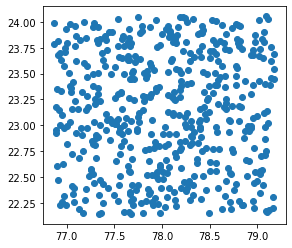

In [9]:
random_points.plot()

In [11]:
random_points.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
l5 = rio.open('./LT05_L1TP_145044_20100428_20161016_01_T1/145044_masked_stacked_wgs84.tif')
l5.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]')

In [9]:

# Dimensions
print(l5.width)
print(l5.height)

7811
6901


In [12]:
print(str(7000*30/1000) + " kilometers of swath")


210.0 kilometers of swath


In [60]:
l5_data = l5.read()

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


In [ ]:
l5_data

In [64]:
l5.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 7811,
 'height': 6901,
 'count': 6,
 'crs': CRS.from_epsg(32643),
 'transform': Affine(30.0, 0.0, 692085.0,
        0.0, -30.0, 2661615.0)}

In [66]:
l5_data.size

323422266

In [68]:
l5_data.min()

0.0

In [69]:
l5_data.max()

0.744654

## Viz


In [64]:
from rasterio.plot import show

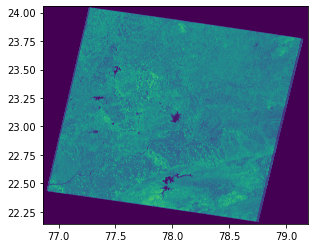

<AxesSubplot:>

In [65]:
show((l5,5))

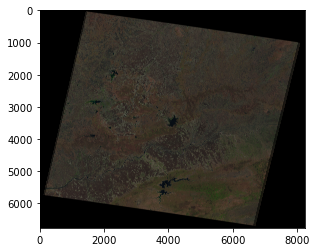

In [66]:
# Create the composite by stacking
nrg = np.dstack((l5.read(5), l5.read(4), l5.read(3)))

# Let's see how our color compozsite looks like
plt.imshow(nrg)

# how do i strech this

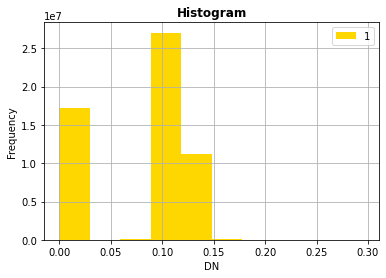

In [63]:
from rasterio.plot import show, show_hist
show_hist((l5,1))

<AxesSubplot:>

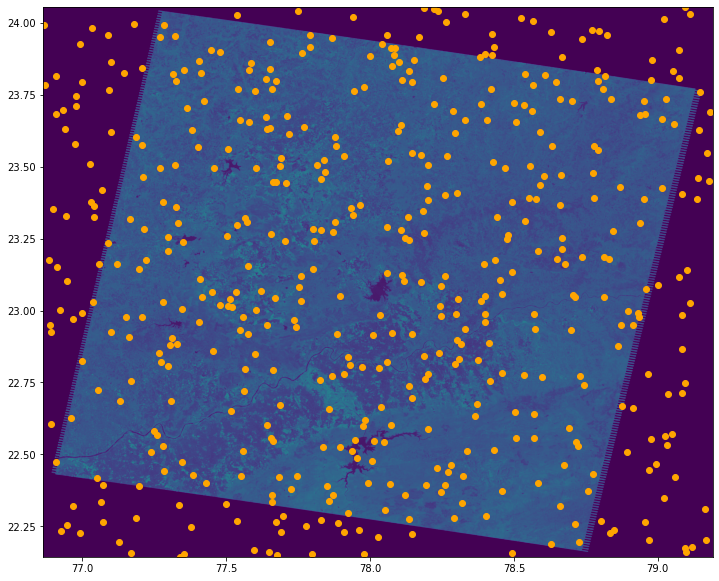

In [72]:
fig, ax = plt.subplots(figsize = (12,12))
random_points.plot(ax = ax, color = 'orange')
show((l5,4), ax = ax)

### starting extraction

In [46]:
random_points['geometry']

0      POINT (78.44989 23.10755)
1      POINT (78.93672 23.67807)
2      POINT (78.74949 22.63525)
3      POINT (77.16359 23.34006)
4      POINT (77.63845 23.67434)
                 ...            
695    POINT (78.65122 23.17917)
696    POINT (78.70153 23.90762)
697    POINT (77.40714 22.95982)
698    POINT (78.33543 22.80308)
699    POINT (77.97365 22.59759)
Name: geometry, Length: 700, dtype: geometry

In [89]:
random_points['b1'] = 0

In [ ]:
for point in random_points['geometry']:
    x = point.xy[0][0] 
    y=point.xy[1][0]
    row, col = l5.index(x,y)
    b1 = l5.read(1)
    
    # print("Point correspond to row. col : %d, %d"%(row, col))
    # print("Raster value on point %.2f \n"%l5.read(1)[row,col])
    # print("Raster value on point %.2f \n"%l5.read(4)[row,col])
    random_points['B1'].loc[point] = b1[row,col]
    #print("B1 value on point %.2f \n"%l5.read(1)[row, col])


In [98]:
for index, row in random_points.iterrows():
    fid = row['id']
    longitude = row['geometry'].x
    latitude = row['geometry'].y
    l5 = rio.open('./LT05_L1TP_145044_20100428_20161016_01_T1/145044_masked_stacked_wgs84.tif')
    b1 = l5.read(1)
    #print(b1)
    rowIndex, colIndex = l5.index( longitude, latitude)
    #print(str( b1[rowIndex, colIndex]))
    random_points['b1'].loc[index] = b1[rowIndex, colIndex]

/var/folders/_8/2qttjw6x0cvcgsy0js39z68r0000gn/T/ipykernel_44775/2767460896.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_points['b1'].loc[index] = b1[rowIndex, colIndex]


<AxesSubplot:>

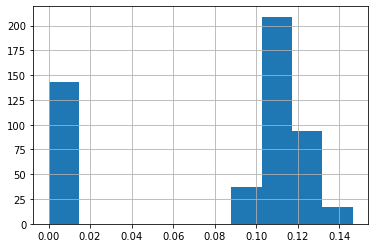

In [106]:
random_points['b1'].hist()

In [ ]:
1